## 2.3
### Question 2

In [1]:
head(npk, 3)

block,N,P,K,yield
1,0,1,1,49.5
1,1,1,0,62.8
1,0,0,0,46.8


In [2]:
fit <- aov(yield ~ N * P, data=npk)
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   5.758 0.0263 *
P            1    8.4    8.40   0.256 0.6187  
N:P          1   21.3   21.28   0.647 0.4305  
Residuals   20  657.4   32.87                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Question 4

In [3]:
head(iris, 5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [4]:
fit <- aov(Sepal.Width ~ Species, data=iris)
summary(fit)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

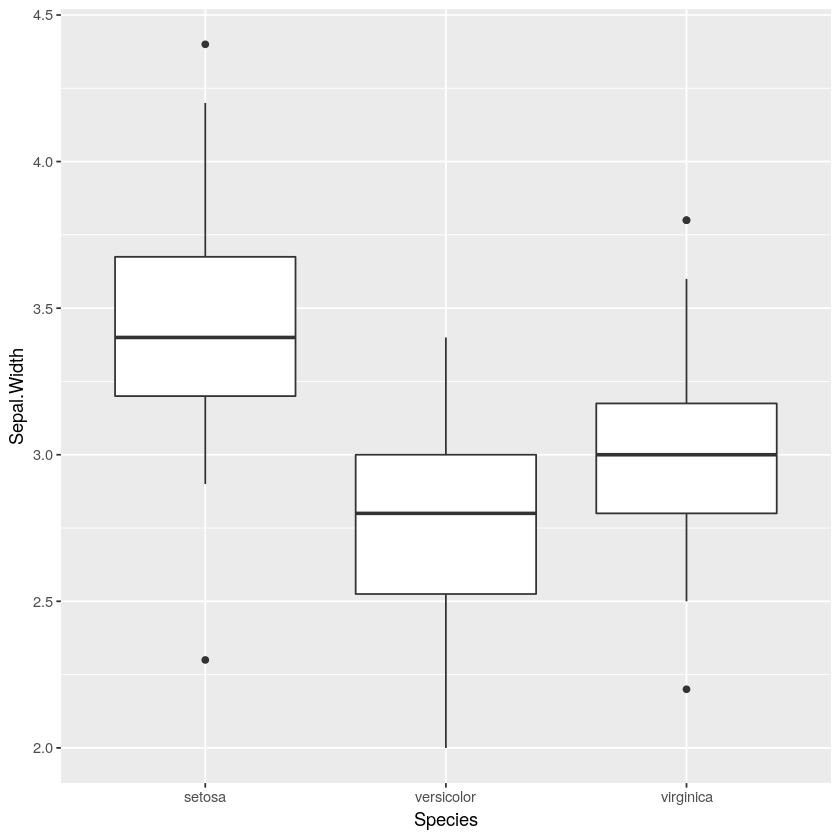

In [5]:
library(ggplot2)

ggplot(iris, aes(x = Species, y = Sepal.Width)) + 
    geom_boxplot()

Проведем множественные сравнения с <a href="https://r-analytics.blogspot.com/2013/10/blog-post_19.html#.W5uBcN0zY5k">поправкой Тьюки</a>.

In [6]:
TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


### Question 5

In [7]:
url <- "https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv"
dest <- 'some1.csv'

In [8]:
download.file(url = url, destfile = dest)

In [9]:
df <- read.csv('some1.csv')
df$patient <- as.factor(df$patient)
head(df, 5)

temperature,pill,doctor,patient
39.33055,A,Aibolit,1
40.74877,B,Aibolit,1
39.33913,A,Aibolit,2
38.20438,B,Aibolit,2
36.99757,A,Aibolit,3


In [10]:
fit <- aov(temperature ~ pill + Error(patient/pill), data=df)
summary(fit)


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 20  87.51   4.375               

### Question 6

In [11]:
fit <- aov(temperature ~ pill * doctor + Error(patient/(pill * doctor)), data=df)
summary(fit)


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: patient:doctor
          Df Sum Sq Mean Sq F value Pr(>F)
doctor     1  15.70  15.696   3.113  0.111
Residuals  9  45.37   5.042               

Error: patient:pill:doctor
            Df Sum Sq Mean Sq F value Pr(>F)
pill:doctor  1  0.422  0.4215   0.146  0.711
Residuals    9 26.014  2.8905               

### Task 1

In [36]:
install.packages('Hmisc')

Installing package into ‘/home/nizhikebinesi/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [37]:
library(ggplot2)
library(Hmisc)
obj <- ggplot(ToothGrowth, aes(x = as.factor(dose), y = len, col = supp, group = supp)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.1, position = position_dodge(0.2)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 3, position = position_dodge(0.2)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'line', position = position_dodge(0.2)) +
    theme_bw()

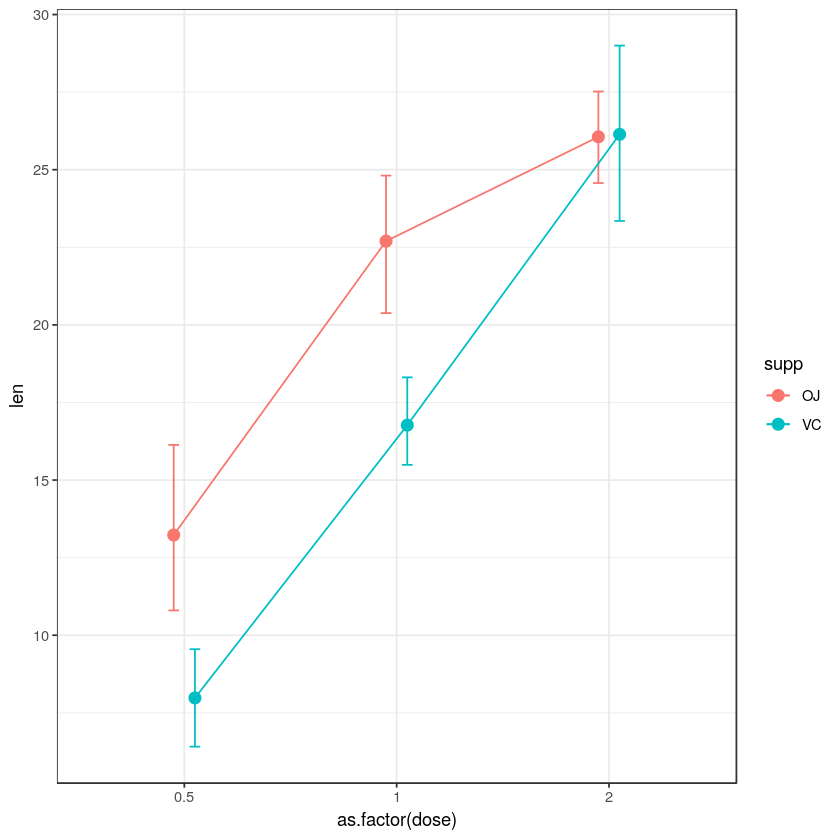

In [39]:
obj